In [ ]:
import torch
from diffusers import AnimateDiffPipeline, MotionAdapter, EulerDiscreteScheduler
from diffusers.utils import export_to_gif
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
from IPython.display import display, Image

device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16 if torch.cuda.is_available() else torch.float32  # Adjust dtype for compatibility

# Define model parameters
step = 4  # Options: [1,2,4,8]
repo = "ByteDance/AnimateDiff-Lightning"
ckpt = f"animatediff_lightning_{step}step_diffusers.safetensors"
base = "emilianJR/epiCRealism"

# Load motion adapter
adapter = MotionAdapter().to(device, dtype)
adapter.load_state_dict(load_file(hf_hub_download(repo, ckpt), device=device))

# Load pipeline
pipe = AnimateDiffPipeline.from_pretrained(base, motion_adapter=adapter, torch_dtype=dtype).to(device)
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing", beta_schedule="linear")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


(…)ff_lightning_4step_diffusers.safetensors:   0%|          | 0.00/908M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/4 [00:00<?, ?it/s]

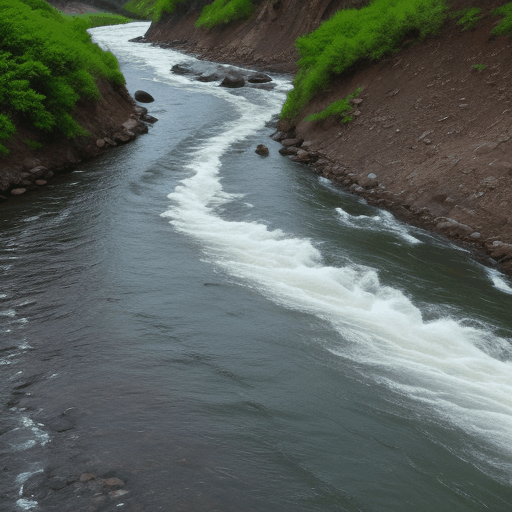

In [ ]:
# Generate animation
output = pipe(prompt="Flowing river", guidance_scale=1.0, num_inference_steps=step)

gif_path = "animation.gif"
export_to_gif(output.frames[0], gif_path)

display(Image(filename=gif_path))